In [1]:
from ddpg_agent import Agent
from environment import Environment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch

In [2]:
critic_checkpoint_path = "checkpoints/checkpoint_reacher_critic.pth"  
actor_checkpoint_path = "checkpoints/checkpoint_reacher_actor.pth"  
env = Environment()
agent = Agent(num_agents = env.num_agents, state_size=env.state_size, action_size=env.action_size, random_seed=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Reacher environment Initialized
(20, 33)
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
Creating 20 agents. Each observes a state with length: 33 and has an action space of size: 4


/home/jdgalviss/repos/robotic_arm_control_RL/ddpg_agent.py:126: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1) # Gradient Clipping


Episode 10	Average Score: 0.68
Episode 20	Average Score: 2.12
Episode 29	Average Score: 5.45Saving checkpoint: iteration: 29, avg_score: 5.45
Episode 30	Average Score: 5.76
Saving checkpoint: iteration: 30, avg_score: 5.76
Episode 31	Average Score: 6.05Saving checkpoint: iteration: 31, avg_score: 6.05
Episode 32	Average Score: 6.38Saving checkpoint: iteration: 32, avg_score: 6.38
Episode 33	Average Score: 6.82Saving checkpoint: iteration: 33, avg_score: 6.82
Episode 34	Average Score: 7.39Saving checkpoint: iteration: 34, avg_score: 7.39
Episode 35	Average Score: 7.97Saving checkpoint: iteration: 35, avg_score: 7.97
Episode 36	Average Score: 8.51Saving checkpoint: iteration: 36, avg_score: 8.51
Episode 37	Average Score: 8.96Saving checkpoint: iteration: 37, avg_score: 8.96
Episode 38	Average Score: 9.57Saving checkpoint: iteration: 38, avg_score: 9.57
Episode 39	Average Score: 9.96Saving checkpoint: iteration: 39, avg_score: 9.96
Episode 40	Average Score: 10.58
Saving checkpoint: iterat

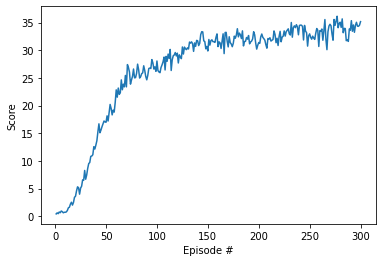

In [3]:
#Train the agent with DDPG
def ddpg(n_episodes=300, max_t=1000, print_every=10, target_score = 5.0):
    scores_deque = deque(maxlen=print_every)
    scores = []
    last_saved_score = 0
    for i_episode in range(1, n_episodes+1):
        states = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            actions = agent.act(states)
            next_states, rewards, dones, _ = env.step(actions)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.average(rewards)
            if any(dones):
                #print("break after {} time steps".format(t))
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=target_score and np.mean(scores_deque) > last_saved_score:
            last_saved_score = np.mean(scores_deque)
            #print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), actor_checkpoint_path)
            torch.save(agent.critic_local.state_dict(), critic_checkpoint_path)
            torch.save(agent.actor_local.state_dict(), "checkpoints/checkpoint_reacher_actor"+str(i_episode)+".pth")
            torch.save(agent.critic_local.state_dict(), "checkpoints/checkpoint_reacher_critic"+str(i_episode)+".pth")
            np.savez("scores.npz",np.array(scores))
            print("\r Saving checkpoint: iteration: {}, avg_score: {:.2f}".format(i_episode, last_saved_score))
            #break
     # Save Agent at the end of training
    #torch.save(agent.actor_local.state_dict(), actor_checkpoint_path)
    #torch.save(agent.critic_local.state_dict(), critic_checkpoint_path)
    return scores

scores = ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()